<h1>Analiza ponudbe dela s strani <a href="https://www.mojedelo.com/">mojedelo.com</a></h1>
Naložim uporabljene knjižnjice

In [7]:
import pandas as pd
from ipywidgets import interact
# IPython.display omogoča prikaz različnih vrst izhodov, kot je Output
from IPython.display import display
# ipywidgets omogoča ustvarjanje interaktivnih gradnikov v Jupyterju
import ipywidgets as widgets



<h2>Uvod</h2>

<blockquote>
Za svojo analizo sem se odločil preučiti oglase, ki so objavljeni na spletnem portalu MojeDelo.si. Ta izbira je bila opravljena, ker sem opazil, da je ta stran edina med podobnimi platformami, kjer lahko dostopam do oglasov, ki niso več aktivni. Domnevam, da je ta posebnost posledica nenamerne napake pri razvoju spletne strani, saj je mogoče do neaktivnih oglasov dostopati preko naslova https://www.mojedelo.com/studentsko-delo/d-######, kjer "######" predstavlja identifikacijsko številko oglasa.
</blockquote>
<blockquote>
Sprva sem želel analizirati samo vsebino oglasov, vendar sem kmalu ugotovil, da bo za dosego tega cilja potrebno izvesti približno 800.000 zahtevkov na spletni portal. Zato sem se odločil razširiti obseg svoje analize in dodati še primerjalno oceno metod, ki bi omogočile optimalen prenos podatkov s spletne strani v obliko CSV datoteke.
</blockquote


<h2>1. Analiza metod</h2>

<h3>1.1 Pisanje v csv datoteko</h3>
<blockquote>
Ker sem bil vnaprej seznanjen z dejstvom, da bom moral po pridobivanju podatkov s spletne strani izvesti shranjevanje podatkov v obliko CSV datoteke, sem se odločil, da bom uporabil knjižnico <i>csv</i>. V njej so že vnaprej definirane funkcije, ki so primerne za to delo. Med njimi izstopajo funkcija <i>writerows</i>, ki omogoča hkraten zapis več vrstic podatkov, ter funkcija <i>writerow</i>, ki zapiše posamezno vrstico naenkrat. Moje zanimanje se je usmerilo v primerjavo učinkovitosti teh dveh metod zapisovanja podatkov v datoteko.

Za namen preizkušanja sem oblikoval dve funkciji: <i>test_writerow</i> in <i>test_writerows</i>. Obe funkciji sprejmeta seznam seznamov kot argument, ki ga nato zapišeta v datoteko. Rezultat izvajanja funkcij je časovno merilo, ki označuje potrebni čas za izvedbo operacije. 

V nadaljevanju sem definiral tudi funkcijo <i>testing_row_rows</i>, ki se osredotoča na preizkušanje učinkovitosti funkcij <i>test_writerow</i> in <i>test_writerows</i> v različnih scenarijih, ob upoštevanju različnih velikosti seznamov in števila ponovitev. Funkcija zapiše povprečne čase v datoteko csv, ki je uporabljena v funkciji <i>plot_rows_row</i>, katera izriše graf časov.
</blockquote>

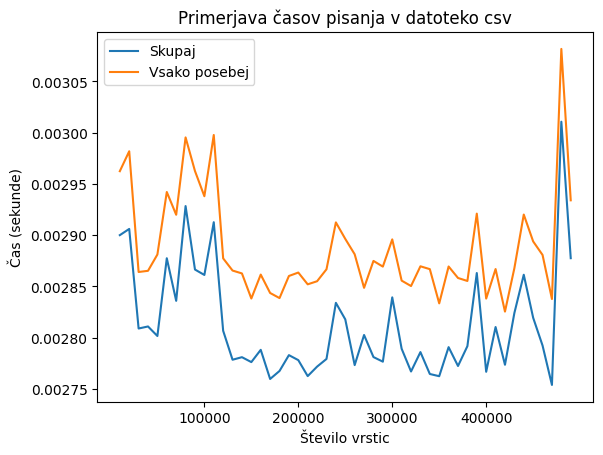

In [8]:
from obdelava_prenos import plot_rows_row
plot_rows_row()

<blockquote>
Iz tega grafa sem ugotovil, da je uporaba metode <i>writerows</i> bolj primerna za učinkovito zapisovanje večjega števila vrstic podatkov. Slednja se je izkazala za hitrejšo in bolj prilagodljivo, predvsem pri obdelavi večjih količin podatkov. Metoda <i>writerow</i> pa se lahko še vedno uporabi za posamezne vrstice ali manjše količine podatkov, vendar je za obsežnejše operacije bolj smiselno uporabiti metodo <i>writerows</i>.
</blockquote>


<h3>1.2 Dostopanje do spletne strani</h3>
<blockquote>
Po nekaj poizkusih dobivanja podatkov s spletne strani sem hitro videl, da če se bi lotil problema samo z eno poizvedbo
na spletno stran, bi prenos vseh oglasov trajal celo večnost, zato sem se najprej odločil uporabiti večnitno procesiranje.
</blockquote>

<h4>1.2.1 Knjižnjice <i>concurrent.futures</i></h4>

<blockquote>
<i>Concurrent.futures</i> zagotavlja visoko nivojski vmesnik za asinhrono izvajanje funkcij s pomočjo nitij ali procesov. Je predvsem uporabljena za vzporednost, kjer se več opravil izvaja sočasno v ločenih nitih ali procesih. Ta knjižnica ponuja dve glavni razredi: ThreadPoolExecutor in ProcessPoolExecutor, ki omogočata, da se funkcije pošljejo in upravljajo za izvajanje.

Rezultati so pokazali izjemno izboljšanje v primerjavi s prejšnjimi poskusi. Na tej točki sem se odločil izvesti dodatno preizkušanje, in sicer kako število niti vpliva na optimalni čas prenosa podatkov. Z namenom izslediti najkrajši čas prenosa sem oblikoval funkcijo <i>test_thread</i>, ki meri čas izvajanja za pridobivanje podatkov ob različnem številu niti in različnih intervalih identifikacijskih številk oglasov. S pomočjo funkcije <i>testing_num_threads</i> sem opravil obsežno testiranje, kjer sem beležil povprečne čase izvajanja v odvisnosti od števila uporabljenih niti. Končne ugotovitve sem grafično prikazal na ustrezni vizualizaciji. 
</blockquote>

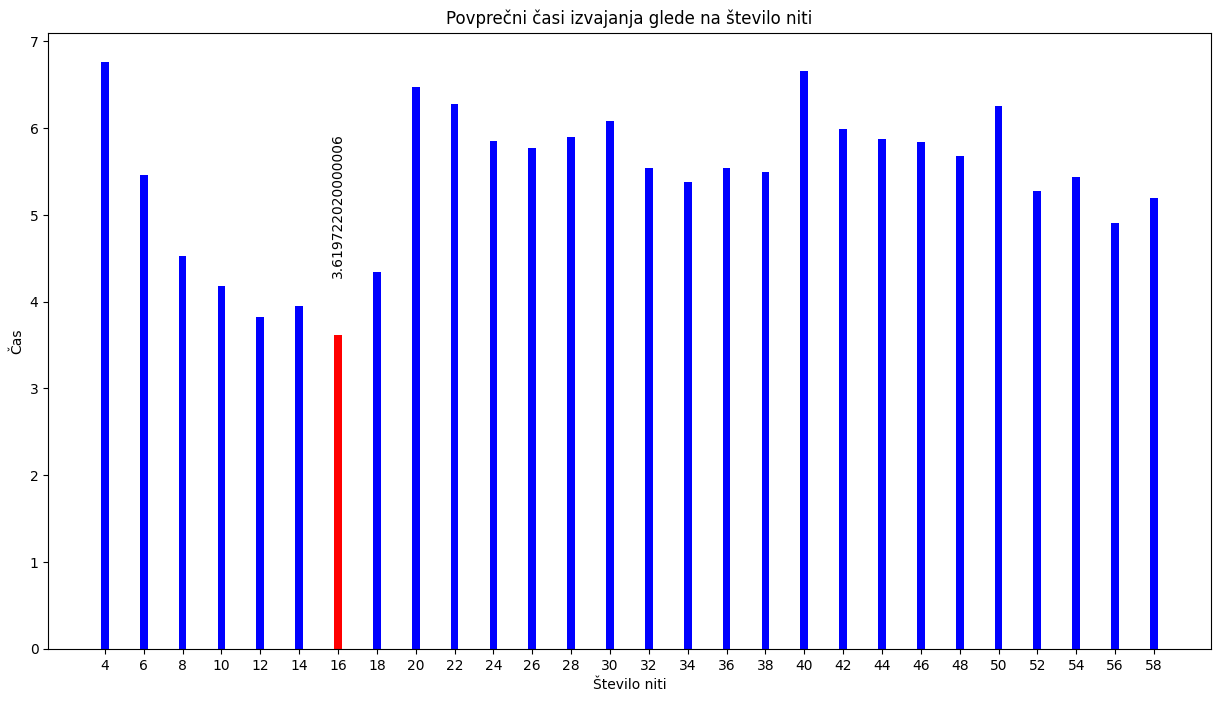

In [9]:
from obdelava_prenos import plot_num_threads
plot_num_threads()

<blockquote>
Prikazan je graf, ki ponazarja povprečne čase izvajanja glede na število uporabljenih niti. Meritve so bile izvedene z pridobivanja podatkov iz 50 oglasov na spletni strani. Celoten postopek je bil ponovljen dvajsetkrat, nato pa je bil izračunan povprečen čas izvajanja. Na podlagi zbranih podatkov in analize grafa lahko zaključimo, da je najučinkovitejše prenašanje doseženo z uporabo šestnajstih niti.
</blockquote>

<h4>1.2.2 Knjižnjica <i>asyncio</i></h4>

<blockquote>
<i>Asyncio</i> je asinhroni okvir za vhodno/izhodno obdelavo (I/O). Zagotavlja dogodkovno usmerjen, enonitni pristop k sočasnosti z uporabo korutin. Korutine so funkcije, ki jih je mogoče začasno ustaviti in nadaljevati, kar omogoča neblokirajoče izvajanje I/O operacij. asyncio je zasnovan za učinkovito upravljanje z mnogimi nalogami, ki vključujejo I/O, brez dodatnih stroškov večih niti ali procesov.
</blockquote>

<h4>1.2.3 Primerjeva učinkovitosti knjižnjic <i>concurrent.futures</i> in <i>asyncio</i></h4>

<blockquote>
Za obe omenjeni knjižnici sem razvijal preizkusni metodi, imenovani <i>test_thread</i> in <i>test_async</i>, ki ob določenem razponu indeksov oglasov vrnejo časovno merilo, potrebno za izvedbo. Naslednje, sem z uporabo funkcije <i>testing_thread_vs_async_average</i> dokumentiral povprečne čase izvedbe obeh zgoraj omenjenih metod, pri različnih intervalih. Rezultate sem sistematično shranil v obliki CSV datoteke. Prav slednjo datoteko sem uporabil za ustvarjanje grafične vizualizacije, ki je predstavljena spodaj.
</blockquote>

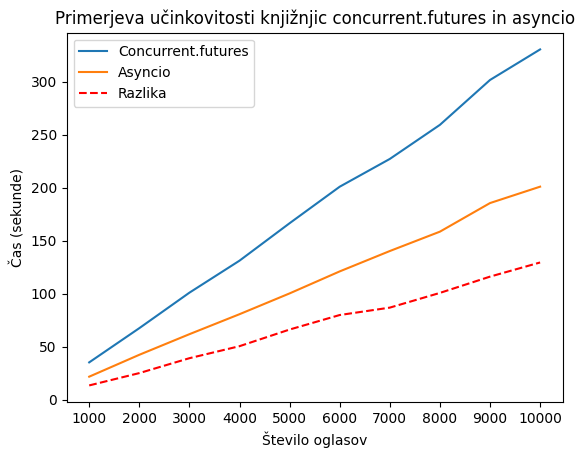

In [10]:
from obdelava_prenos import plot_niti_vs_asinhrono
plot_niti_vs_asinhrono()

<blockquote>
Iz grafa je razvidno, da je knjižnica asyncio (označena z oranžno črto) pokazala hitrejše rezultate v primerjavi s knjižnico concurrent.futures (označena z modro črto). Poleg tega se je razlika med njima (rdeča črtkana črta) povečevala s povečevanjem števila oglasov na spletni strani. To nakazuje, da je asyncio bolj primerna za učinkovito pridobivanje večjih količin podatkov s spletne strani <a href="https://www.mojedelo.com/">mojedelo.com</a>. 

Na podlagi teh rezultatov sem se za pridobivanje podatkov s spletne strani odločil uporabiti knjižnjico asyncio.
</blockquote>

<h2>2. Analiza Podatkov</h2>
<blockquote>
Podatke sem sistematično zbral v obliko CSV datoteke, kjer so organizirani v petih stolpcih: Ponudba, Datum, Ponudnik, Lokacija, in Spol. Celoten nabor neobdelanih podatkov je obsegal 363.139 vrstic.

Nadalje sem izvedel naslednje korake za urejanje podatkov:



<ol>
<li>Sprva sem podatke pridobil iz datoteke "all_data.csv" in jih naložil v ustrezen podatkovni okvir (DataFrame).</li>
<li>
Prvi korak urejanja je vključeval odstranitev stolpca "Spol", saj se je izkazalo, da je ta stolpec irelevanten za nadaljnjo analizo.
</li>
<li>Za zagotovitev konsistentnega formata sem preoblikoval stolpec "Datum" v ustrezen datetime format. Prav tako sem izbrisal vrstice, kjer so manjkali podatki v stolpcu "Datum", kar je prispevalo k čiščenju podatkov.</li>
<li>Dodatno sem v okviru obogatitve analize ustvaril nov stolpec, ki sem ga poimenoval "Leto", kjer sem zajel leto, povezano z vsakim posameznim zapisom.</li>
<li>
Potem se odstranil vse vrstice, ki se ponovijo.
</li>
<li>Zaključno sem urejene podatke shranil v novo datoteko "data.csv", ki je predstavljala prečiščen nabor podatkov za nadaljnjo analizo.</li>
</ol>
</blockquote>

In [11]:
def uredi_podatke():
    # Naloži CSV datoteko v DataFrame
    csv_file = 'all_data/all_data.csv' 
    df = pd.read_csv(csv_file,on_bad_lines='skip') #1.
    df.drop('Spol', inplace=True, axis=1) #2.
    df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y', errors='coerce') #3.
    df = df.dropna(subset=['Datum'])
    df['Leto'] = df['Datum'].dt.year #4.
    df.drop_duplicates() #5.
    df.to_csv('all_data/data.csv', index=False,date_format='%d.%m.%Y') #6.


<blockquote>
Nekaj vrstic tabele urejene padajoče po letu:
</blockquote>

In [12]:
display(pd.read_csv('podatki/Oglasi/processed_data.csv').sort_values('Leto').head(15))

,Ponudba,Datum,Ponudnik,Lokacija,Leto
51295,Monter centralno ogrevalnih naprav,16.06.2004,Trenkwalder d.o.o.,Ruše,2004
11733,Elektro monter,23.08.2004,El prima d.o.o.,Ljubljana,2004
11734,Vodja prodaje novim ključnim kupcem (m/ž),23.08.2004,Hill International d.o.o.,Ljubljana,2004
11735,Osebni finančni svetovalec,30.08.2004,Sava plus d.d.,po Sloveniji,2004
11736,Monter elektro inštalacij,24.08.2004,EPG-INSTALACIJE d.o.o.,Grosuplje-Ljubljana,2004
11737,Komercialist - zastopnik,24.08.2004,"Kadrovski inženiring, KI d.o.o.",Ljubljana,2004
11738,Monter klimatskih naprav,24.08.2004,"Atama agencija za zaposlovanje, d.o.o.",Ljubljana in okolica,2004
11739,Vodja prodaje in podpore uporabnikom,24.08.2004,Xlab d.o.o.,Ljubljana,2004
11740,Poučevanje strokovnih gradbenih predmetov,24.08.2004,"EDC Kranj, Poklicno-tehnična gradbena šola, Vi...",Kranj,2004
11741,Profesor matematike,24.08.2004,"EDC Kranj, Poklicno-tehnična gradbena šola, Vi...",Kranj,2004


<h3>2.1 Letno število oglasov</h3>
<blockquote>
Spodaj predstavljeni graf, generiran s pomočjo funkcije <i>get_letno</i>, vizualizira število oglasov glede na obdobje med leti 2005 in 2023.
</blockquote>

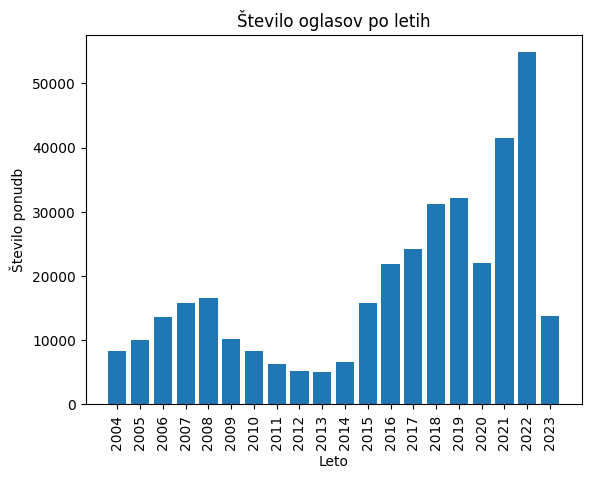

In [13]:
from obdelava_podatkov import plot_letno
plot_letno()

<blockquote>
Graf jasno kaže vztrajno rast števila oglasov do približno četrtine obdobja, okoli leta 2008, kar odraža naraščajočo potrebo po delovnih mestih v tem časovnem obdobju. V kasnejših letih, približno do leta 2013, opazimo upad števila oglasov. Ta upad bi se lahko deloma pripisal gospodarskim spremembam, vendar pa bi lahko bil tudi posledica vstopa novih platform za iskanje delovnih mest na trg.

Graf subtilno namiguje na pomemben dogodek, ki je močno vplival na tržišče dela. Med letom 2020 je opazen izrazit padec števila oglasov, ki ga je verjetno povzročila svetovna pandemija COVID-19. Omejitve in gospodarski pretresi v tem obdobju so privedli do zmanjšane potrebe po novih zaposlenih, kar je razvidno iz graf.

Kljub temu se v naslednjih letih, proti koncu analiziranega obdobja okoli leta 2023, znova opazi povečanje števila oglasov. Ta pozitivni premik bi lahko bil posledica postopnega okrevanja gospodarstva po pandemiji in prilagajanja na nove načine dela ter iskanja zaposlitve, kot tudi vpliva digitalizacije na tržišče dela.
</blockquote>

<h3>2.2 Mesečno število oglasov</h3>
<blockquote>
Spodaj prikazan graf, ki ga je generirala funkcija <i>get_mesec</i>, ponuja vizualno interpretacijo mesečnega števila oglasov glede na izbrano leto. Uporabnik ima možnost izbire leta med obdobjem 2004-2023.
</blockquote>

In [14]:
from obdelava_podatkov import plot_mesec
# Ustvarjanje interaktivnega drsnika za izbiro leta
leto_slider = widgets.IntSlider(
    value=2020,     # Privzeta vrednost
    min=2004,       # Minimalna vrednost 
    max=2023,       # Maksimalna vrednost 
    step=1,         # Korak za drsenje po vrednostih
    description='Leto:',  # Opis drsnika
    continuous_update=False,  # Posodabljanje rezultata se zgodi po sprostitvi drsnika
)

# Definiranje funkcije za posodabljanje izhoda na osnovi vrednosti drsnika
def update_output_1(change):
    output_1.clear_output()   # Počisti obstoječi izhod
    with output_1:
        leto_value = leto_slider.value
        plot_mesec(leto_value)  # Kliči funkcijo z izbranim letom

# Povezovanje funkcije update_output s spremembami vrednosti drsnika
leto_slider.observe(update_output_1, names='value')

# Ustvarjanje izhoda in prikaz drsnika ter izhoda
output_1 = widgets.Output()
update_output_1(None)  # Izvedi začetno prikazovanje rezultatov

display(leto_slider, output_1)  # Prikaz drsnika in izhoda


IntSlider(value=2020, continuous_update=False, description='Leto:', max=2023, min=2004)

Output()

<h3>2.3 Povprečno mesečno število oglasov</h3>
<blockquote>
Spodaj prikazan graf, ki ga je generirala funkcija <i>get_mesec</i>, ponuja vizualno interpretacijo mesečnega števila oglasov glede na izbrano leto. Uporabnik ima možnost izbire leta med obdobjem 2004-2023.
</blockquote>

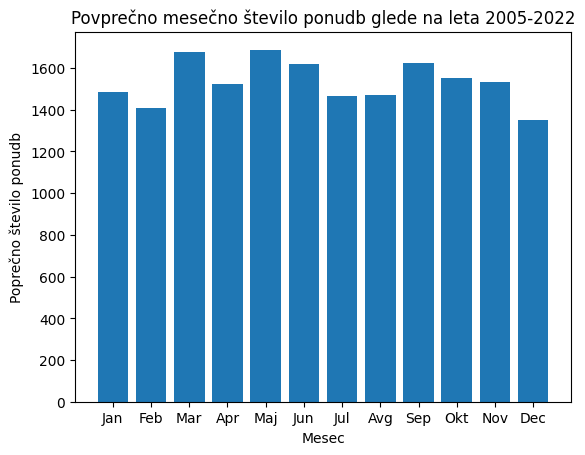

In [15]:
from obdelava_podatkov import plot_mesec_povp
plot_mesec_povp()

<h3>2.4 Število ponudb za delo od doma</h3>
<blockquote>
Spodaj prikazan graf, ki ga je generirala funkcija <i>get_mesec</i>, ponuja vizualno interpretacijo mesečnega števila oglasov glede na izbrano leto. Uporabnik ima možnost izbire leta med obdobjem 2004-2023.
</blockquote>

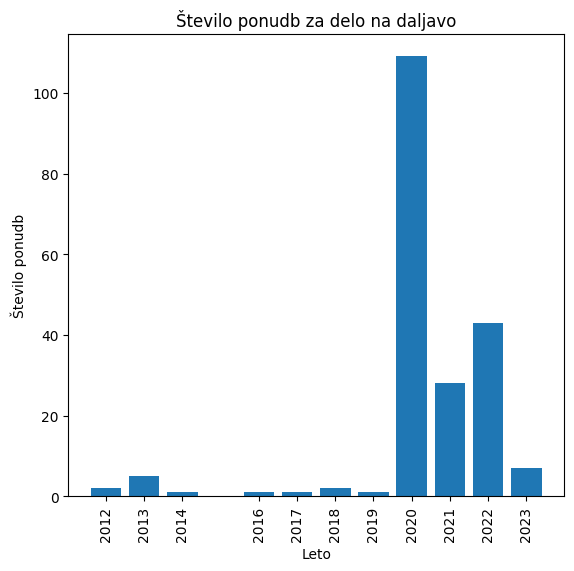

In [16]:
from obdelava_podatkov import plot_st_od_doma
plot_st_od_doma()

<blockquote>
Zgornji graf, ki prikazuje število ponudb za delo na daljavo, izraža izjemno pomembno opazovanje: opazna je izrazita korelacija med obdobjem pandemije koronavirusa in porastom števila takšnih ponudb. Število ponudb za delo na daljavo se je značilno povečalo med letom, ko je pandemija dosegla svoj vrh, kar se odraža kot izrazit skok v grafičnem prikazu. Ta povečana aktivnost kaže na prilagajanje delodajalcev in iskalcev zaposlitve spremenjenim okoliščinam, saj se je število ljudi, ki delajo od doma, znatno povečalo zaradi omejitev in varnostnih ukrepov.

Posebej pomembno je dejstvo, da kljub umiritvi rasti po koncu pandemičnega obdobja število ponudb za delo na daljavo ostaja na višji ravni kot pred pandemijo. Ta vztrajen porast kaže na trajnejšo spremembo v načinu dela in življenjskih vzorcev, kjer je delo na daljavo postalo bolj sprejemljivo in zaželeno tako za delodajalce kot za zaposlene.
</blockquote>

<h3>2.5 Število ponudb posameznih podjetij</h3>
<blockquote>
Poglejmo si še, katera so podjetja, ki objavljajo največ oglasov 
</blockquote>

In [17]:
from obdelava_podatkov import plot_st_ponudnik


# Ustvarjanje interaktivnih drsnikov za argumente leta in st_podjetji
leta_slider = widgets.IntRangeSlider(
    value=[2004, 2005],  # Privzeta vrednost
    min=2004,           # Minimalna vrednost 
    max=2023,           # Maksimalna vrednost 
    step=1,             # Korak za drsenje po vrednostih
    description='Leta:',   # Opis drsnika
    continuous_update=False,  # Posodabljanje rezultata se zgodi po sprostitvi drsnika
)

st_podjetji_slider = widgets.IntSlider(
    value=25,         # Privzeta vrednost
    min=11,            # Minimalna vrednost 
    max=30,           # Maksimalna vrednost 
    step=1,           # Korak za drsenje po vrednostih
    description='Št. podjetji:',  # Opis drsnika
    continuous_update=False,     # Posodabljanje rezultata se zgodi po sprostitvi drsnika
)

# Definiranje funkcije za posodabljanje izhoda na osnovi vrednosti drsnikov
def update_output_2(change):
    output_2.clear_output()   # Počisti obstoječi izhod
    with output_2:
        leta_range = leta_slider.value
        st_podjetji_value = st_podjetji_slider.value
        plot_st_ponudnik(leta_range, st_podjetji_value)  # Kliči funkcijo z izbranimi argumenti

# Povezovanje funkcije update_output s spremembami vrednosti drsnikov
leta_slider.observe(update_output_2, names='value')
st_podjetji_slider.observe(update_output_2, names='value')

# Ustvarjanje izhoda in prikaz drsnikov ter izhoda
output_2 = widgets.Output()
update_output_2(None)  # Izvedi začetno prikazovanje rezultatov

display(leta_slider, st_podjetji_slider, output_2)  # Prikaz drsnikov in izhoda


IntRangeSlider(value=(2004, 2005), continuous_update=False, description='Leta:', max=2023, min=2004)

IntSlider(value=25, continuous_update=False, description='Št. podjetji:', max=30, min=11)

Output()

<h3>2.6 Največji ponudniki del po letih</h3>
<blockquote>
Poglejmo si še katera so podjetja ki objavljajo največ oglasov 
</blockquote>

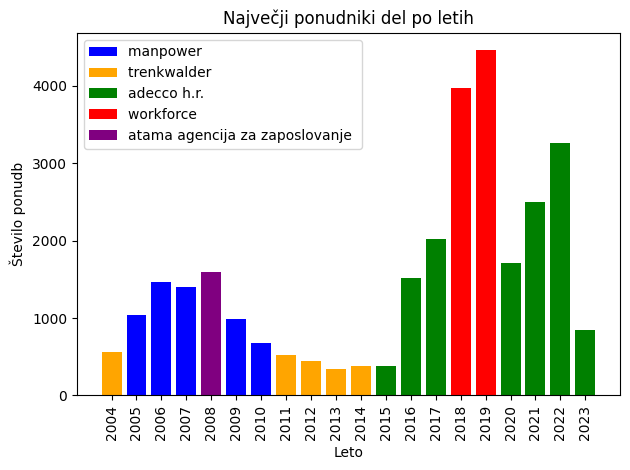

In [18]:
from obdelava_podatkov import plot_best_ponudnik
plot_best_ponudnik()

<blockquote>
Ponudniki, kot so "manpower," "adecco h.r.," in "workforce," so v različnih letih imeli največje število ponudb. Kar je logično, saj se vsa tri podjetja ukvarjajo s kadrovskimi storitvami. Število ponudb se je skozi leta spreminjalo. Na primer, "manpower" je imel večje število ponudb v letih 2005, 2006, in 2007, medtem ko je "workforce" zaznal največje število ponudb v letih 2018 in 2019. 
</blockquote>

<h3>2.7 Analiza po lokacijah</h3>

<h4>2.7.1 Analiza števila ponudb glede na lokacijo</h4>
<blockquote>
Pri analizi podatkov po lokacijah sem se osredotočil na razumevanje distribucije ponudb glede na različne geografske lokacije. Cilj je bil pridobiti vpogled v to, kje se ponudbe najpogosteje pojavljajo in kako se razporejajo po določenih lokacijah. 
Za dosego tega cilja sem uporabil naslednje korake:
<ol>

<li>
Najprej sem prebral podatke iz datoteke "data.csv" in ustvaril DataFrame. Nato sem združil podatke po stolpcu "Lokacija" in preštel, kolikokrat se vsaka lokacija pojavlja.
</li>
<li>
Da bi zagotovil dosledno obliko lokacij, sem odstranil posebne znake iz vrednosti in razdelil lokacije glede na različna ločila, kot so "in", ",", "-". To je omogočilo boljše razumevanje in primerjavo podatkov.
</li>
<li>
Uporabil sem seznam predhodno znanih lokacij iz datoteke "lokacije.json" ter dodal nekaj dodatnih ključnih lokacij. Preimenoval sem in združil lokacije, ki so bile podobne ali so se nanašale na isto območje. Prav tako sem filtriral le tiste lokacije, ki so se ujemale s seznamom ključnih lokacij.

Datoteko "lokacije.json" sestavlja seznam imen sveh držav svet, slovenskih naselij in slovenskih regij. Vse podatke sem prenesel iz Wikipedie s pomočjo funkcij <i>get_drzave</i>, <i>get_regije</i>, <i>get_naselja</i>.
</li>
<li>
Združil sem podatke po obdelanih lokacijah in seštel število ponudb v vsaki lokaciji. To je ustvarilo jasen pregled o tem, kako se razporejajo ponudbe zaposlitev v različnih regijah.
</li>
<li>
Na koncu sem shranil obdelane in združene podatke v novo CSV datoteko "filtered_locations.csv". Te podatke sem nato uporabil za vizualizacijo, ki je prikazana spodaj.
</li>

</ol>

</blockquote>

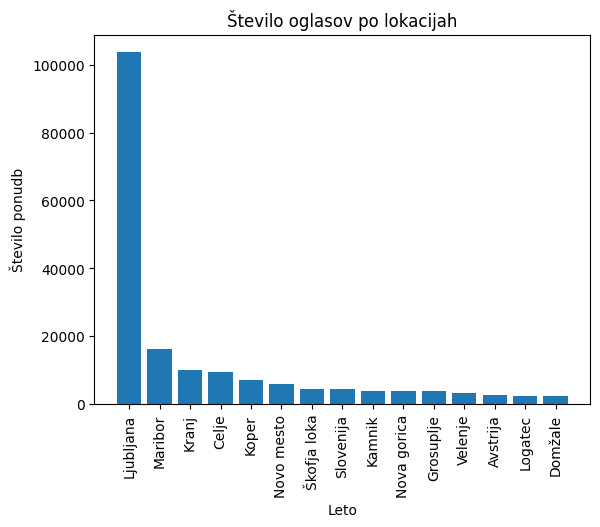

In [19]:
from obdelava_podatkov import plot_top_lokacije
plot_top_lokacije()

<h4>2.7.2 Analiza ponudnikov glede na lokacijo</h4>
<blockquote>
Zbral sem podatke o različnih lokacijah, številu ponudb zaposlitev ter najpogostejših ponudnikih na trgu. Da bi lažje razumel, kako so ponudniki razporejeni po različnih regijah in kateri od njih so najbolj izstopajoči, sem se odločil uporabiti toplotno karto (heatmap). 
Toplotna karta, znana tudi kot "heatmap" v angleščini, je vizualno orodje za prikazovanje podatkov na način, ki poudarja različne ravni frekvence v določenem območju. Uporablja barvno lestvico, da prikaže, kako pogosto se pojavljajo določeni dogodki ali vrednosti znotraj določenega območja ali okvirja. 
Pri toplotnih kartah so posamezni podatki prikazani kot posamezli celice v matriki, kjer je vsali celica pobarvana glede na njeno vrednost ali intenzitet . Tako lahko na prvi pogled opazimo vzorce, koncentracije ali trende v podatkihAnaliziral bom, kako so ponudniki razporejeni v različnih delih Slovenije ter kateri od njih prevladujejo na trgu dela.a.
</blockquote>

In [20]:
from obdelava_podatkov import plot_heatmap


# Ustvarjanje interaktivnih drsnikov za argumente leta in st_podjetji
st_ponudnikov_slider = widgets.IntSlider(
    value=3,  # Privzeta vrednost
    min=2,           # Minimalna vrednost 
    max=4,           # Maksimalna vrednost 
    step=1,             # Korak za drsenje po vrednostih
    description='Št. ponudnikov:',   # Opis drsnika
    continuous_update=False,  # Posodabljanje rezultata se zgodi po sprostitvi drsnika
)

st_lokacij_slider = widgets.IntSlider(
    value=10,         # Privzeta vrednost
    min=2,            # Minimalna vrednost 
    max=12,           # Maksimalna vrednost
    step=1,           # Korak za drsenje po vrednostih
    description='Št. lokacij:',  # Opis drsnika
    continuous_update=False,     # Posodabljanje rezultata se zgodi po sprostitvi drsnika
)

# Definiranje funkcije za posodabljanje izhoda na osnovi vrednosti drsnikov
def update_output_3(change):
    output_3.clear_output()   # Počisti obstoječi izhod
    with output_3:
        plot_heatmap(st_ponudnikov_slider.value, st_lokacij_slider.value)  # Kliči funkcijo z izbranimi argumenti

# Povezovanje funkcije update_output s spremembami vrednosti drsnikov
st_ponudnikov_slider.observe(update_output_3, names='value')
st_lokacij_slider.observe(update_output_3, names='value')

# Ustvarjanje izhoda in prikaz drsnikov ter izhoda
output_3 = widgets.Output()
update_output_3(None)  # Izvedi začetno prikazovanje rezultatov

display(st_ponudnikov_slider, st_lokacij_slider, output_3)  # Prikaz drsnikov in izhoda

IntSlider(value=3, continuous_update=False, description='Št. ponudnikov:', max=4, min=2)

IntSlider(value=10, continuous_update=False, description='Št. lokacij:', max=12, min=2)

Output()

<blockquote>
Zgornja toplotna karta (pri izbranih podatkih Št. lokacij = 3 in Št. ponudnikov =10 ). Vzeli smo 10 mest in za vsako izbrali tri podjetja, ki objavljajo največ oglasov na teh lokacijah.

Ob analizi predstavljenih podatkov lahko opazimo, da podjetje Addecco h.r. zaseda izjemno močno pozicijo na trgu, saj se njihova prisotnost razteza na kar sedem izmed obravnavanih lokacij. Zatem sledi podjetje Workforce, ki ima pristotnost na štirih lokacijah. Navedeni vzorec utegne izvirati iz narave dejavnosti obeh podjetij, saj sta oba prepoznavna kot kadrovski agenciji, specializirani za posredovanje delovne sile.

Poleg tega lahko iz analize razberemo, da se ponudniki zaposlitev razporejajo neenakomerno glede na geografske regije. Jasno izstopajoča koncentracija ponudnikov na določenih lokacijah nakazuje na pomembne centre gospodarske aktivnosti in zaposlovanja v državi. Ljubljana in Maribor očitno privlačita več delovnih mest in s tem tudi več oglasov za zaposlitev.
</blockquote>

<h2>3. Zaključek</h2>
<blockquote>
Po skrbni analizi podatkov, pridobljenih iz različnih oglasov za zaposlitev, se razkriva sliko dinamike in strukture trga dela, ki odraža raznolikost in obsežnost zaposlitvenih priložnosti na različnih geografskih lokacijah. Pregled različnih ponudb za zaposlitev nam je omogočil vpogled v trende, vzorce in prioritete, ki prevladujejo na trgu dela. Geografska analiza je prinesla zanimive ugotovitve o regionalni neenakomernosti v številu delovnih mest. Večja mesta kažejo večjo aktivnost in zanimanje za zaposlovanje, kar kaže na pomembnost teh območij v gospodarskem kontekstu. Pomembno je opozoriti tudi na vlogo kadrovskih agencij, ki so se izkazale kot ključni akterji pri povezovanju iskalcev zaposlitve in delodajalcev. To poudarja njihov vpliv na prilagajanje trgu dela ter vlogi, ki jo imajo pri zadovoljevanju potreb po delovni sili na različnih mestih. Iz podatkov se jasno kaže, da je pandemija koronavirusa imela izrazit in prepoznaven vpliv na trg dela. 
</blockquote>